/Users/cliu/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


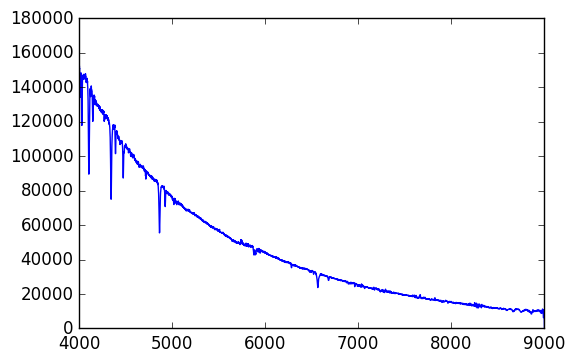

In [2]:
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits

def loadData(filename):
    '''
    Read fits data
    
    '''
    tchfits = fits.open(filename)
    tabl = tchfits[1].data
    return tabl

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

# measure the redshift from an absorption line
filename = '351110104.fits'
tchfits = fits.open(filename)
log_wv0 = tchfits[0].header['CRVAL1']
log_dwv = tchfits[0].header['CD1_1']

sp = tchfits[0].data

N = len(sp[0,:])
wv = 10**(log_wv0+np.arange(0,N,1)*log_dwv)

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
ax.plot(wv,sp[0,:])
ax.set_xlim([4000,9000])
fig.show()

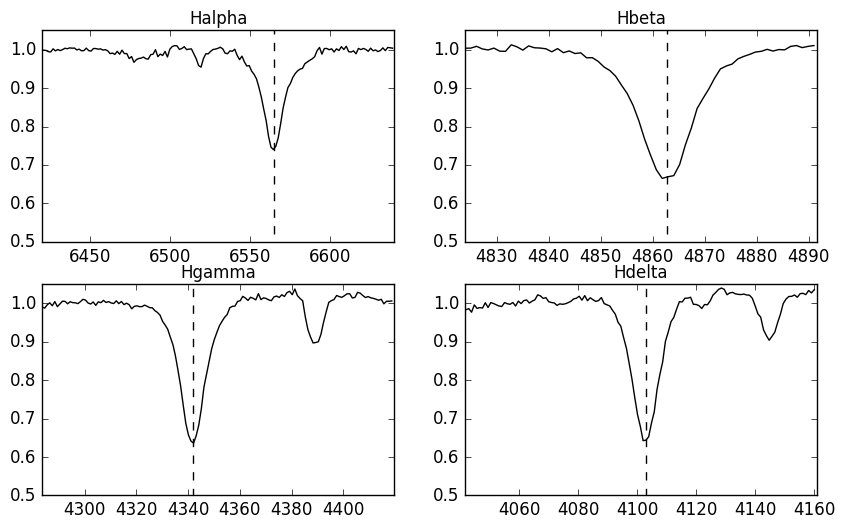

In [16]:
Ha_0 = 6564.6
Hb_0 = 4862.71
Hg_0 = 4341.69
Hd_0 = 4102.89

Ha_cont = [6420.00,6455.00,6600.00,6640.00]
Hb_cont = [4823.875,4847.875,4876.625,4891.625]
Hg_cont = [4283.50,4319.75,4367.25,4419.75]
Hd_cont = [4041.60,4079.75,4128.50,4161.00]

def normSpec(wv,sp,cont):
    ind_cont1 = (wv>=cont[0]) & (wv<=cont[1])
    ind_cont2 = (wv>=cont[2]) & (wv<=cont[3])
    fc1 = np.mean(sp[ind_cont1])
    wv1 = np.mean(wv[ind_cont1])
    fc2 = np.mean(sp[ind_cont2])
    wv2 = np.mean(wv[ind_cont2])
    fc = (fc2-fc1)/(wv2-wv1)*(wv-wv1)+fc1
    normsp = sp/fc
    return normsp

def gauss(x,A,mu,sig):
    return 1.-A*np.exp(-(x-mu)**2/(2*sig**2))

#normalize Halpha
normsp_Ha = normSpec(wv,sp[0,:],Ha_cont)
ind_Ha = (wv>=Ha_cont[0]) & (wv<=Ha_cont[3])
normsp_Ha = normsp_Ha[ind_Ha]
wv_Ha = wv[ind_Ha]
#normalize Hbeta
normsp_Hb = normSpec(wv,sp[0,:],Hb_cont)
ind_Hb = (wv>=Hb_cont[0]) & (wv<=Hb_cont[3])
normsp_Hb = normsp_Hb[ind_Hb]
wv_Hb = wv[ind_Hb]
#normalize Hgamma
normsp_Hg = normSpec(wv,sp[0,:],Hg_cont)
ind_Hg = (wv>=Hg_cont[0]) & (wv<=Hg_cont[3])
normsp_Hg = normsp_Hg[ind_Hg]
wv_Hg = wv[ind_Hg]
#normalize Hdelta
normsp_Hd = normSpec(wv,sp[0,:],Hd_cont)
ind_Hd = (wv>=Hd_cont[0]) & (wv<=Hd_cont[3])
normsp_Hd = normsp_Hd[ind_Hd]
wv_Hd = wv[ind_Hd]

fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(221)
ax.plot(wv_Ha,normsp_Ha,'k-')
#y = gauss(wv_Ha,0.26,Ha_0,7.5)
#ax.plot(wv_Ha,y,'r--')
ax.plot([Ha_0,Ha_0],[0.,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Ha_cont[0],Ha_cont[3]])
ax.set_title('Halpha',fontsize=12)

ax = fig.add_subplot(222)
ax.plot(wv_Hb,normsp_Hb,'k-')
#y = gauss(wv_Hb,0.335,Hb_0,5.0)
#ax.plot(wv_Hb,y,'r--')
ax.plot([Hb_0,Hb_0],[0.0,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hb_cont[0],Hb_cont[3]])
ax.set_title('Hbeta',fontsize=12)

ax = fig.add_subplot(223)
ax.plot(wv_Hg,normsp_Hg,'k-')
#y = gauss(wv_Hg,0.36,Hg_0,5.0)
#ax.plot(wv_Hg,y,'r--')
ax.plot([Hg_0,Hg_0],[0.0,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hg_cont[0],Hg_cont[3]])
ax.set_title('Hgamma',fontsize=12)

ax = fig.add_subplot(224)
ax.plot(wv_Hd,normsp_Hd,'k-')
#y = gauss(wv_Hd,0.36,Hd_0,4.4)
#ax.plot(wv_Hd,y,'r--')
ax.plot([Hd_0,Hd_0],[0.0,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hd_cont[0],Hd_cont[3]])
ax.set_title('Hdelta',fontsize=12)

fig.show()

mean wavelength = 4862.513
std wavelength = 6.008
shift Delta lambda/lambda = -0.00004056
velocity = -12.167 km/s
std line width = 370.655 km/s

mean wavelength = 4862.559
std wavelength = 5.998
shift Delta lambda/lambda = -0.00003112
velocity = -9.337 km/s
std line width = 370.049 km/s

mean wavelength = 4862.557
std wavelength = 6.023
shift Delta lambda/lambda = -0.00003137
velocity = -9.412 km/s
std line width = 371.578 km/s


mean vel = -12.229+/-2.262


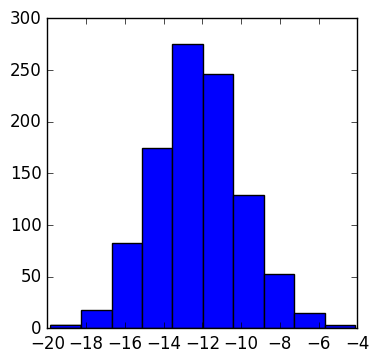

In [27]:
#random sampling for Hbeta

y = 1.-normsp_Hb[(wv_Hb>4840.)]
x = wv_Hb[(wv_Hb>4840.)]
N = 100000

M = 1000
vlos_mc_Hb = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)
    ind_acc = (y_s0<=y_x)

    x_s = x_s0[ind_acc]

    if m<3:
        print 'mean wavelength = %(m).3f' % {'m': np.mean(x_s)}
        print 'std wavelength = %(m).3f' % {'m': np.std(x_s)}
        print 'shift Delta lambda/lambda = %(m).8f' % {'m': (np.mean(x_s)-Hb_0)/Hb_0}
        print 'velocity = %(m).3f km/s' % {'m': (np.mean(x_s)-Hb_0)/Hb_0*300000.0}
        print 'std line width = %(m).3f km/s\n' % {'m': (np.std(x_s))/Hb_0*300000.0}
    vlos_mc_Hb[m] = (np.mean(x_s)-Hb_0)/Hb_0*300000.0

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc_Hb,10)
fig.show()
print '\nmean vel = %(m).3f+/-%(d).3f' % {'m': np.mean(vlos_mc_Hb), 'd': np.std(vlos_mc_Hb)}

mean wavelength = 6565.358
std wavelength = 9.619
shift Delta lambda/lambda = 0.00011544
velocity = 34.631 km/s
std line width = 439.566 km/s

mean wavelength = 6565.462
std wavelength = 9.632
shift Delta lambda/lambda = 0.00013132
velocity = 39.395 km/s
std line width = 440.189 km/s

mean wavelength = 6565.481
std wavelength = 9.563
shift Delta lambda/lambda = 0.00013426
velocity = 40.279 km/s
std line width = 437.013 km/s


mean vel = 35.345+/-2.536


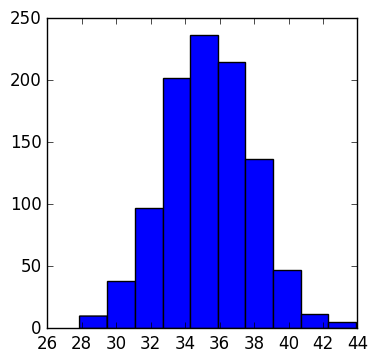

In [28]:
#random sampling for Halpha

y = 1.-normsp_Ha[(wv_Ha>6535.) & (wv_Ha<6600.)]
x = wv_Ha[(wv_Ha>6535.) & (wv_Ha<6600.)]
N = 100000

M = 1000
vlos_mc = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)
    ind_acc = (y_s0<=y_x)

    x_s = x_s0[ind_acc]

    if m<3:
        print 'mean wavelength = %(m).3f' % {'m': np.mean(x_s)}
        print 'std wavelength = %(m).3f' % {'m': np.std(x_s)}
        print 'shift Delta lambda/lambda = %(m).8f' % {'m': (np.mean(x_s)-Ha_0)/Ha_0}
        print 'velocity = %(m).3f km/s' % {'m': (np.mean(x_s)-Ha_0)/Ha_0*300000.0}
        print 'std line width = %(m).3f km/s\n' % {'m': (np.std(x_s))/Ha_0*300000.0}
    vlos_mc[m] = (np.mean(x_s)-Ha_0)/Ha_0*300000.0

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc,10)
fig.show()
print '\nmean vel = %(m).3f+/-%(d).3f' % {'m': np.mean(vlos_mc), 'd': np.std(vlos_mc)}
vlos_mc_Ha = vlos_mc

mean wavelength = 4341.550
std wavelength = 5.808
shift Delta lambda/lambda = -0.00003228
velocity = -9.684 km/s
std line width = 401.352 km/s

mean wavelength = 4341.589
std wavelength = 5.796
shift Delta lambda/lambda = -0.00002319
velocity = -6.956 km/s
std line width = 400.470 km/s

mean wavelength = 4341.547
std wavelength = 5.832
shift Delta lambda/lambda = -0.00003292
velocity = -9.877 km/s
std line width = 402.994 km/s


mean vel = -10.156+/-2.526


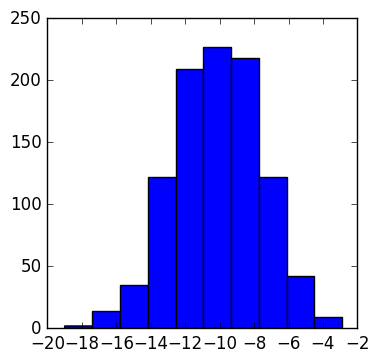

In [29]:
#random sampling for Hgamma

y = 1.-normsp_Hg[(wv_Hg<4370.) &(wv_Hg>4320.)]
x = wv_Hg[(wv_Hg<4370.) &(wv_Hg>4320.)]
N = 100000

M = 1000
vlos_mc = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)
    ind_acc = (y_s0<=y_x)

    x_s = x_s0[ind_acc]

    if m<3:
        print 'mean wavelength = %(m).3f' % {'m': np.mean(x_s)}
        print 'std wavelength = %(m).3f' % {'m': np.std(x_s)}
        print 'shift Delta lambda/lambda = %(m).8f' % {'m': (np.mean(x_s)-Hg_0)/Hg_0}
        print 'velocity = %(m).3f km/s' % {'m': (np.mean(x_s)-Hg_0)/Hg_0*300000.0}
        print 'std line width = %(m).3f km/s\n' % {'m': (np.std(x_s))/Hg_0*300000.0}
    vlos_mc[m] = (np.mean(x_s)-Hg_0)/Hg_0*300000.0

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc,10)
fig.show()
print '\nmean vel = %(m).3f+/-%(d).3f' % {'m': np.mean(vlos_mc), 'd': np.std(vlos_mc)}
vlos_mc_Hg = vlos_mc

mean wavelength = 4102.755
std wavelength = 4.314
shift Delta lambda/lambda = -0.00003297
velocity = -9.890 km/s
std line width = 315.424 km/s

mean wavelength = 4102.733
std wavelength = 4.315
shift Delta lambda/lambda = -0.00003834
velocity = -11.501 km/s
std line width = 315.496 km/s

mean wavelength = 4102.704
std wavelength = 4.351
shift Delta lambda/lambda = -0.00004527
velocity = -13.582 km/s
std line width = 318.144 km/s


mean vel = -13.031+/-1.868


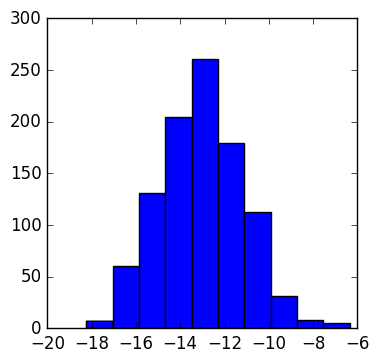

In [30]:
#random sampling for Hdelta

y = 1.-normsp_Hd[(wv_Hd<4119.) & (wv_Hd>4080.)]
x = wv_Hd[(wv_Hd<4119.) & (wv_Hd>4080.)]
N = 100000

M = 1000
vlos_mc = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)
    ind_acc = (y_s0<=y_x)

    x_s = x_s0[ind_acc]

    if m<3:
        print 'mean wavelength = %(m).3f' % {'m': np.mean(x_s)}
        print 'std wavelength = %(m).3f' % {'m': np.std(x_s)}
        print 'shift Delta lambda/lambda = %(m).8f' % {'m': (np.mean(x_s)-Hd_0)/Hd_0}
        print 'velocity = %(m).3f km/s' % {'m': (np.mean(x_s)-Hd_0)/Hd_0*300000.0}
        print 'std line width = %(m).3f km/s\n' % {'m': (np.std(x_s))/Hd_0*300000.0}
    vlos_mc[m] = (np.mean(x_s)-Hd_0)/Hd_0*300000.0

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc,10)
fig.show()
print '\nmean vel = %(m).3f+/-%(d).3f' % {'m': np.mean(vlos_mc), 'd': np.std(vlos_mc)}
vlos_mc_Hd = vlos_mc

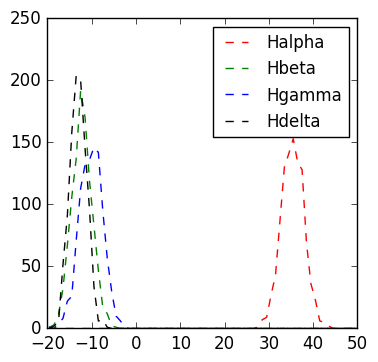

In [39]:
vgrid = np.arange(-200,200,1)
vcenter = (vgrid[1:]+vgrid[0:-1])/2.
h_Ha,xedge = np.histogram(vlos_mc_Ha, vgrid)
h_Hb,xedge = np.histogram(vlos_mc_Hb, vgrid)
h_Hg,xedge = np.histogram(vlos_mc_Hg, vgrid)
h_Hd,xedge = np.histogram(vlos_mc_Hd, vgrid)


fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
pa, = ax.plot(vcenter,h_Ha,'r--',label='Halpha')
pb, = ax.plot(vcenter,h_Hb,'g--',label='Hbeta')
pg, = ax.plot(vcenter,h_Hg,'b--',label='Hgamma')
pd, = ax.plot(vcenter,h_Hd,'k--',label='Hdelta')
ax.legend([pa,pb,pg,pd],['Halpha','Hbeta','Hgamma','Hdelta'],fontsize=12)
ax.set_xlim((-20,50))
fig.show()

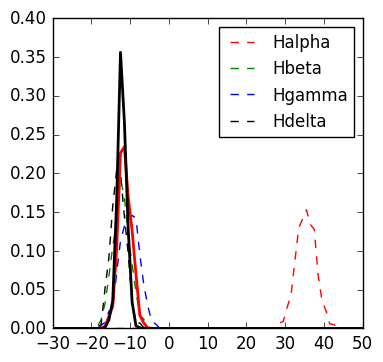

In [40]:
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
pa, = ax.plot(vcenter,h_Ha/np.float(np.sum(h_Ha)),'r--',label='Halpha')
pb, = ax.plot(vcenter,h_Hb/np.float(np.sum(h_Hb)),'g--',label='Hbeta')
pg, = ax.plot(vcenter,h_Hg/np.float(np.sum(h_Hg)),'b--',label='Hgamma')
pd, = ax.plot(vcenter,h_Hd/np.float(np.sum(h_Hd)),'k--',label='Hdelta')
#ax.plot(vcenter, h_Ha*h_Hb/np.float(np.sum(h_Hb*h_Ha)),'r--')
ax.plot(vcenter, h_Hg*h_Hb/np.float(np.sum(h_Hb*h_Hg)),'r-',linewidth=2)
ax.plot(vcenter, h_Hd*h_Hg*h_Hb/np.float(np.sum(h_Hb*h_Hg*h_Hd)),'k-',linewidth=2)
ax.legend([pa,pb,pg,pd],['Halpha','Hbeta','Hgamma','Hdelta'],fontsize=12)
ax.set_xlim((-30,50))

fig.show()